In [6]:
using DataFrames
using CSV

In [8]:
rts_dir = "../../../../RTS-GMLC/RTS_Data"
data_dir = "$rts_dir/SourceData"
ts_dir = "$rts_dir/timeseries_data_files"

"../../../../RTS-GMLC/RTS_Data/timeseries_data_files"

In [9]:
rts_data = Dict()

for k in ["gen", "branch", "dc_branch", "bus", "reserves", "storage", "simulation_objects", "timeseries_pointers"]
    rts_data[k] = CSV.read("$data_dir/$k.csv")
end

rts_data["timeseries_data"] = Dict()
rts_data["timeseries_data"]["DAY_AHEAD"] = Dict(
    "CSP" => CSV.read("$ts_dir/CSP/DAY_AHEAD_Natural_Inflow.csv"),
    "Hydro" => CSV.read("$ts_dir/Hydro/DAY_AHEAD_Hydro.csv"),
    "Load" => CSV.read("$ts_dir/Load/DAY_AHEAD_regional_Load.csv"),
    "PV" => CSV.read("$ts_dir/PV/DAY_AHEAD_pv.csv"),
    "RTPV" => CSV.read("$ts_dir/RTPV/DAY_AHEAD_rtpv.csv"),
    "WIND" => CSV.read("$ts_dir/WIND/DAY_AHEAD_wind.csv"),
    "Reserves" => Dict()
)
rts_data["timeseries_data"]["REAL_TIME"] = Dict(
    "CSP" => CSV.read("$ts_dir/CSP/REAL_TIME_Natural_Inflow.csv"),
    "Hydro" => CSV.read("$ts_dir/Hydro/REAL_TIME_Hydro.csv"),
    "Load" => CSV.read("$ts_dir/Load/REAL_TIME_regional_Load.csv"),
    "PV" => CSV.read("$ts_dir/PV/REAL_TIME_pv.csv"),
    "RTPV" => CSV.read("$ts_dir/RTPV/REAL_TIME_rtpv.csv"),
    "WIND" => CSV.read("$ts_dir/WIND/REAL_TIME_wind.csv"),
    "Reserves" => Dict()
)
for resv_type in ["Flex_Down", "Flex_Up", "Reg_Down", "Reg_Up", "Spin_Up_R1", "Spin_Up_R2", "Spin_Up_R3"]
    rts_data["timeseries_data"]["DAY_AHEAD"]["Reserves"][resv_type] = CSV.read("$ts_dir/Reserves/DAY_AHEAD_regional_$resv_type.csv")
end
for resv_type in ["Reg_Down", "Reg_Up", "Spin_Up_R1", "Spin_Up_R2", "Spin_Up_R3"]
    rts_data["timeseries_data"]["REAL_TIME"]["Reserves"][resv_type] = CSV.read("$ts_dir/Reserves/REAL_TIME_regional_$resv_type.csv")
end

In [10]:
using Plots

In [11]:
regen = Dict()
for (k,d) in rts_data["timeseries_data"]["DAY_AHEAD"]
    if in(k, ["CSP", "Hydro", "PV", "RTPV", "WIND"])
        regen[k] = [sum(d[i,5:end]) for i in 1:size(d,1)]
    end
end

In [12]:
function show_plot(name::String, ndays::Int)
    plot(reshape(regen[name][1:(24*ndays)], 24, :), 
        title = "Daily $name Generation",
        legend = false)
end

function show_plot(ndays::Int)
    allgen = sum([
        reshape(gen[1:(24*ndays)], 24, :)
        for (k,gen) in regen
    ])
    plot(allgen, 
        title = "Daily Renewable Generation",
        legend = false)
end

show_plot (generic function with 2 methods)

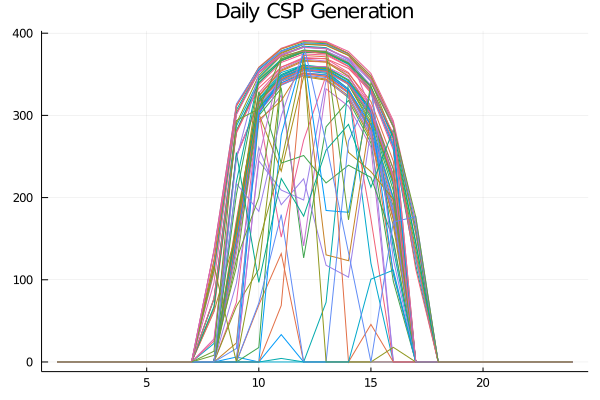

In [13]:
show_plot("CSP", 64)

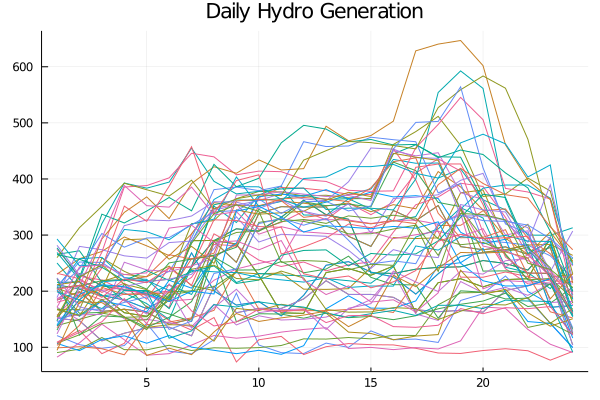

In [14]:
show_plot("Hydro", 64)

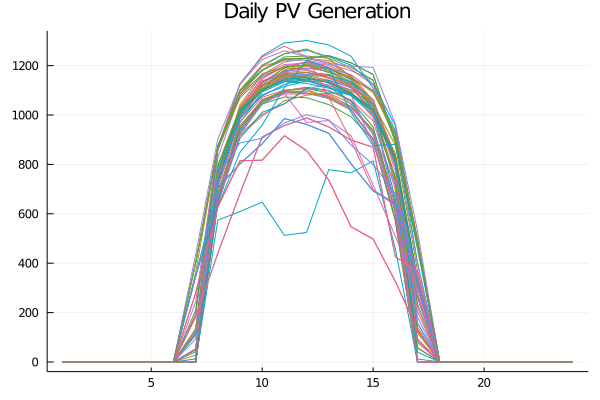

In [15]:
show_plot("PV", 64)

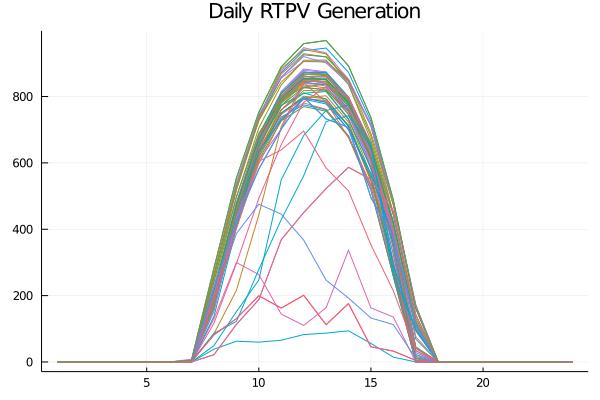

In [16]:
show_plot("RTPV", 64)

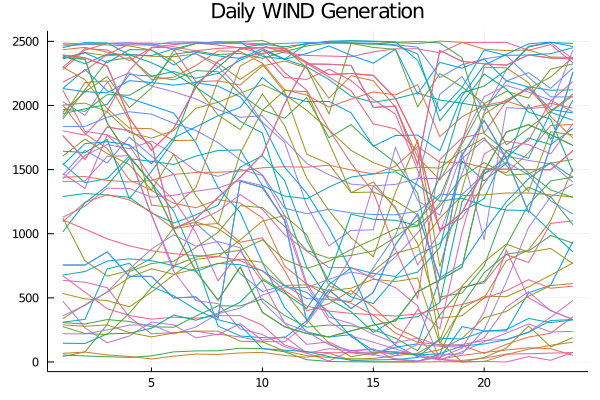

In [17]:
show_plot("WIND", 64)

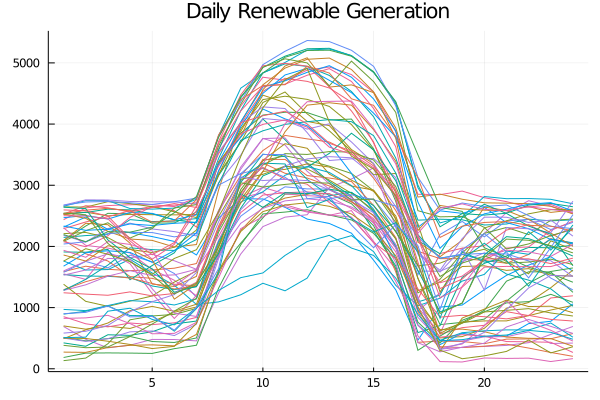

In [18]:
show_plot(64)